<h1>Small Image Classification Using Simple Aritifical Neural Network</h1>

In [165]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
# Version Information
# tensorflow 2.2.0 , Cudnn7.6.5 and Cuda 10.1 , python 3.8

In [130]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [131]:
tf.__version__

'2.9.1'

In [132]:
tf.test.is_built_with_cuda()

True

In [133]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [134]:
X_train.shape

(50000, 32, 32, 3)

In [135]:
X_test.shape

(10000, 32, 32, 3)

In [136]:
y_train.shape

(50000, 1)

In [137]:
y_train[3]

array([4], dtype=uint8)

<h4 >Data Visualization</h4>

In [138]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

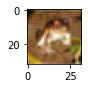

In [139]:
plot_sample(0)

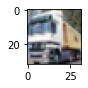

In [140]:
plot_sample(1)

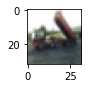

In [141]:
plot_sample(2)

In [142]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

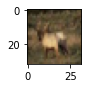

In [143]:
plot_sample(3)

In [144]:
classes[y_train[3][0]]

'deer'

In [145]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [146]:
y_test.shape

(10000, 1)

In [147]:
X_train.shape

(50000, 32, 32, 3)

<h4 style="color:purple">Preprocessing: Scale images</h4>

In [148]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [149]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [150]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [151]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

<h4 >Model building and training</h4>

In [152]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 109s 69ms/step - loss: 1.8130 - accuracy: 0.3534


<h4>Let's make some predictions</h4>

In [153]:
y_predicted = model.predict(X_test_scaled)

313/313 [==============================] - 7s 23ms/step


In [154]:
y_predicted[0]

array([0.3515959 , 0.6414204 , 0.65538365, 0.7808851 , 0.3194261 ,
       0.730035  , 0.86449915, 0.13308829, 0.35728556, 0.1380469 ],
      dtype=float32)

313/313 [==============================] - 8s 24ms/step


Text(69.0, 0.5, 'Truth')

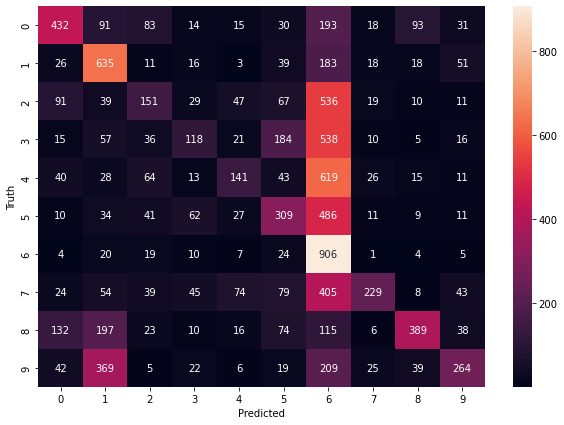

In [155]:
y_predicted = model.predict(X_test_scaled)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [161]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted_labels))



              precision    recall  f1-score   support

           0       0.53      0.43      0.48      1000
           1       0.42      0.64      0.50      1000
           2       0.32      0.15      0.21      1000
           3       0.35      0.12      0.18      1000
           4       0.39      0.14      0.21      1000
           5       0.36      0.31      0.33      1000
           6       0.22      0.91      0.35      1000
           7       0.63      0.23      0.34      1000
           8       0.66      0.39      0.49      1000
           9       0.55      0.26      0.36      1000

    accuracy                           0.36     10000
   macro avg       0.44      0.36      0.34     10000
weighted avg       0.44      0.36      0.34     10000



<h4 >Let's use CNN</h4>

In [167]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [172]:
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [173]:
cnn.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 44s 28ms/step - loss: 1.3632 - accuracy: 0.5121


In [175]:
y_predicted_new = cnn.predict(X_test_scaled)

313/313 [==============================] - 3s 9ms/step


In [177]:
y_predicted_new.shape

(10000, 10)

In [185]:
y_predicted_new_labels = [np.argmax(i) for i in y_predicted_new]


Text(69.0, 0.5, 'Truth')

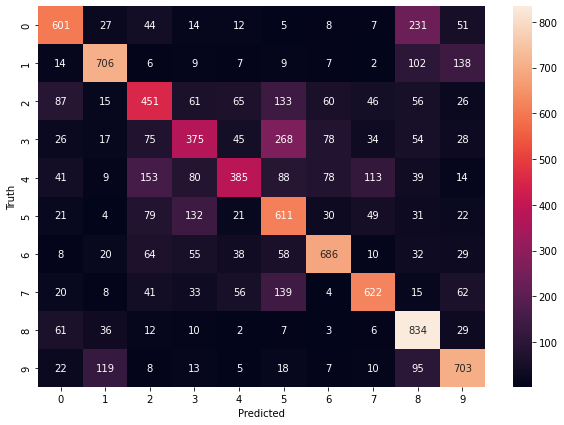

In [186]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_new_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [187]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted_new_labels))

              precision    recall  f1-score   support

           0       0.67      0.60      0.63      1000
           1       0.73      0.71      0.72      1000
           2       0.48      0.45      0.47      1000
           3       0.48      0.38      0.42      1000
           4       0.61      0.39      0.47      1000
           5       0.46      0.61      0.52      1000
           6       0.71      0.69      0.70      1000
           7       0.69      0.62      0.66      1000
           8       0.56      0.83      0.67      1000
           9       0.64      0.70      0.67      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.59     10000
weighted avg       0.60      0.60      0.59     10000

